https://3months.tistory.com/325

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
titanic=pd.read_csv("titanic.csv")

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# 변수타입 확인 후 타입변경
titanic['Survived']=titanic['Survived'].astype(object)
titanic['Pclass']=titanic['Pclass'].astype(object)

In [25]:
#Data Null값 체크
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# 결측치의 비율 확인
# 결측치를 제외하는 경우 complete data analysis, 결측치를 대치할 경우 Imputation이라고 함.
missing_df=titanic.isnull().sum().reset_index()
missing_df.columns=['column','count']
missing_df['ratio']=missing_df['count']/titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


<AxesSubplot:>

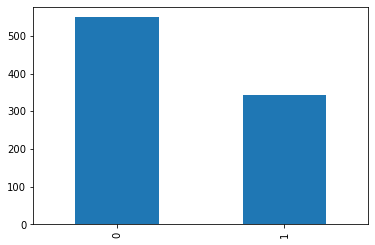

In [16]:
#종속변수 체크
titanic['Survived'].value_counts().plot(kind='bar')

In [17]:
#명목형 변수 분포 탐색을 위해 명목형 변수 리스트 생성
category_feature=[col for col in titanic.columns if titanic[col].dtype=='object']
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [83]:
#불필요한 명목형 변수 제거
category_feature=list(set(category_feature)-set(['Survived','PassengerId']))
category_feature

['Embarked', 'Ticket', 'Pclass', 'Name', 'Sex', 'Cabin']

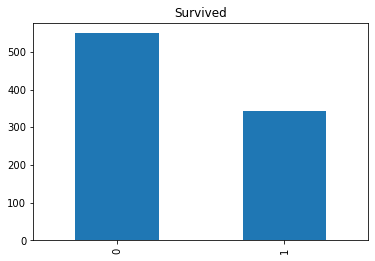

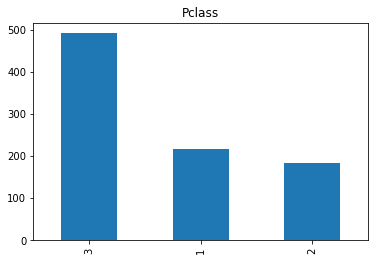

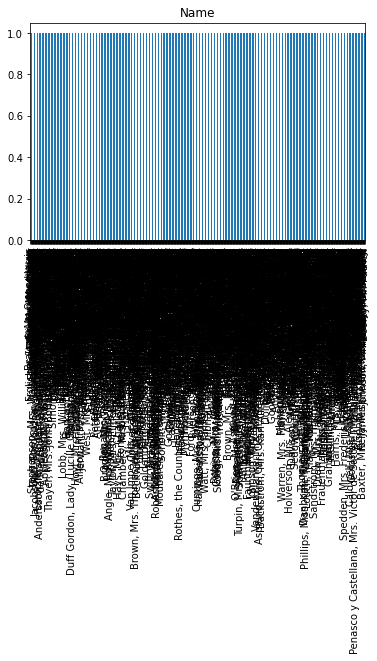

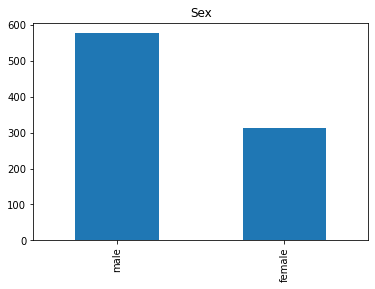

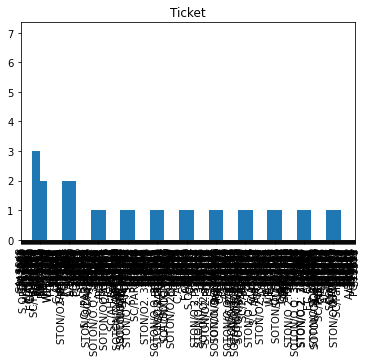

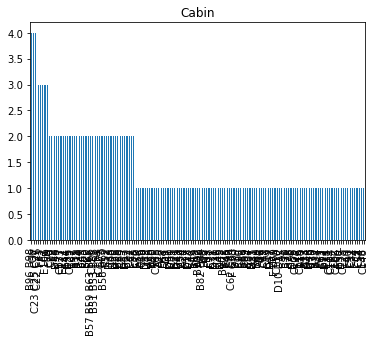

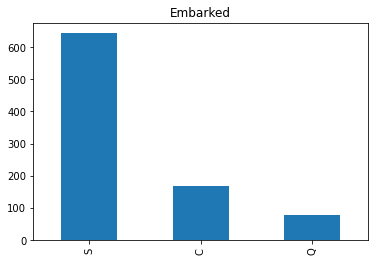

In [19]:
#명목형 : 단변수 탐색
for col in category_feature:
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

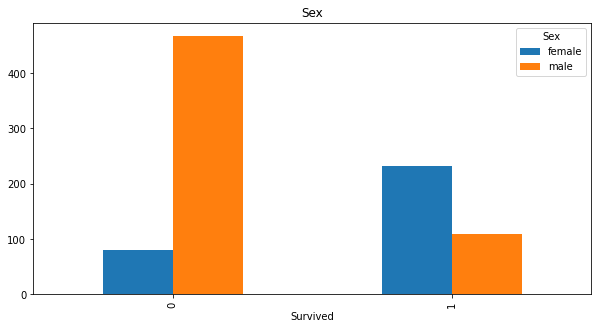

In [91]:
#명목형 : 이변수 탐색
sex_df=titanic.groupby(['Sex','Survived'])['Sex'].count().unstack('Sex')
sex_df.plot(kind='bar',figsize=(10,5))
plt.title('Sex')
plt.show()

In [30]:
# 수치형 변수 분포 탐색을 위해 수치형 변수 확인
numerical_feature=list(set(titanic.columns)-set(category_feature)-set(['PassengerId','Survived']))
numerical_feature

['Parch', 'Fare', 'SibSp', 'Age']

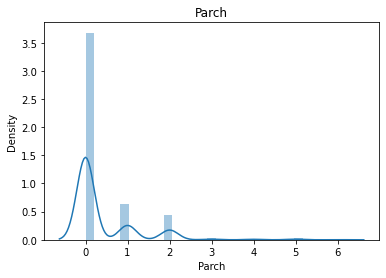

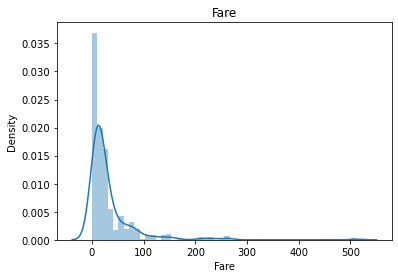

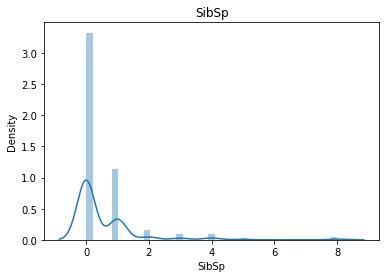

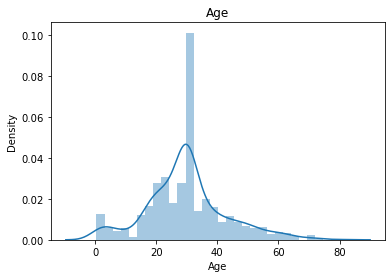

In [31]:
#수치형-수치형 : 단변수
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(),col])
    plt.title(col)
    plt.show()

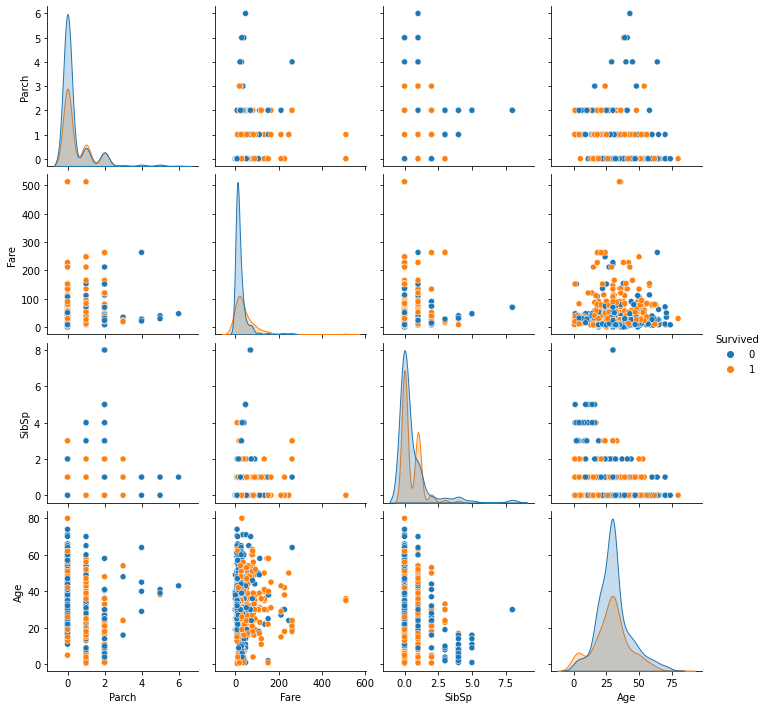

In [36]:
#수치형-수치형 : 다변수
sns.pairplot(titanic[list(numerical_feature)+['Survived']],hue='Survived',  # hue:색깔구분
            x_vars=numerical_feature,y_vars=numerical_feature)
plt.show()

In [37]:
#수치형, 명목형 변수 간의 관계 탐색
unique_list=titanic['Sex'].unique()
unique_list

array(['male', 'female'], dtype=object)

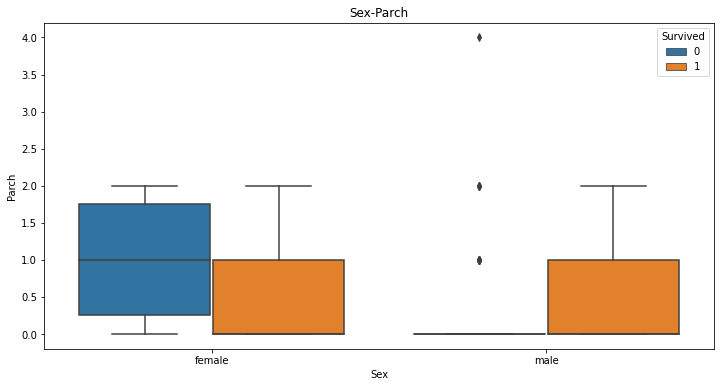

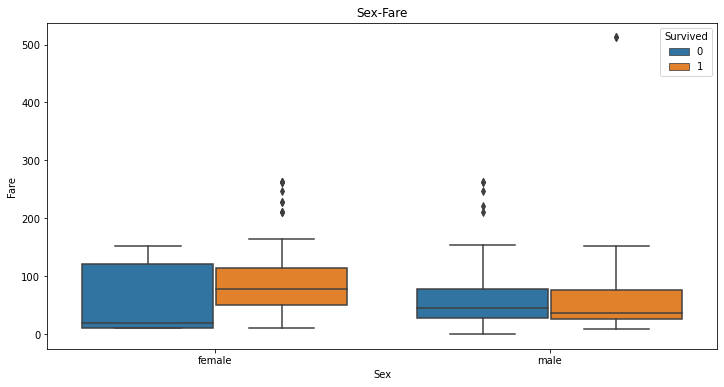

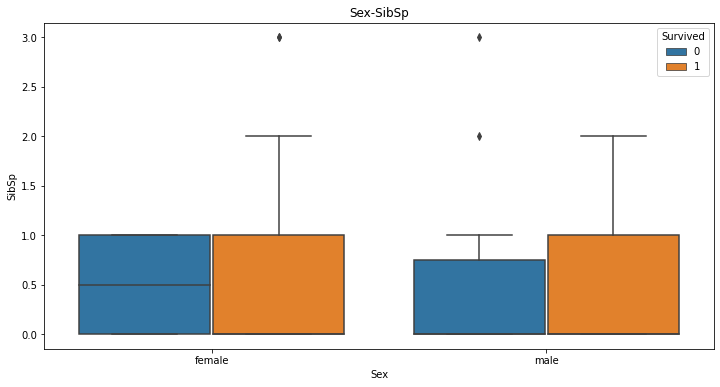

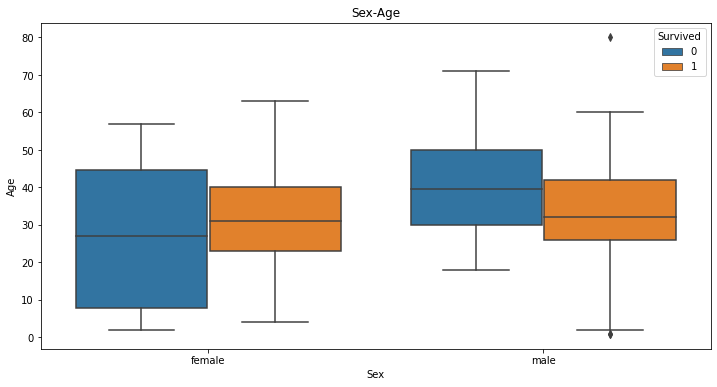

In [38]:
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Sex',y=col,hue='Survived',data=titanic.dropna())
    plt.title('Sex-{}'.format(col))
    plt.show()